<a href="https://colab.research.google.com/github/sagar9926/Visualisations-/blob/master/PADHAI_Data_Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Tabulation

In [2]:
url = 'https://api.covid19india.org/states_daily.json'

In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve(url,'data.json')

('data.json', <http.client.HTTPMessage at 0x7fbf2d8712e8>)

In [5]:
covid_data = pd.read_json('data.json')

In [6]:
covid_data

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
...,...
508,"{'an': '67', 'ap': '9067', 'ar': '68', 'as': '..."
509,"{'an': '1', 'ap': '88', 'ar': '0', 'as': '7', ..."
510,"{'an': '28', 'ap': '10004', 'ar': '78', 'as': ..."
511,"{'an': '61', 'ap': '8772', 'ar': '63', 'as': '..."


In [7]:
import json

In [8]:
with open ('data.json') as f:
  data = json.load(f)
data = data['states_daily']

In [9]:
covid_data = pd.json_normalize(data)
covid_data.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [10]:
df = covid_data

In [11]:
df.date = pd.to_datetime(df.date)

In [12]:
df = df[df.status == "Confirmed"]

In [13]:
df.drop("status",axis = 1, inplace  = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df.set_index("date",inplace = True)

In [15]:
df.head()

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2020-03-14 to 2020-08-31
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      171 non-null    object
 1   ap      171 non-null    object
 2   ar      171 non-null    object
 3   as      171 non-null    object
 4   br      171 non-null    object
 5   ch      171 non-null    object
 6   ct      171 non-null    object
 7   dd      171 non-null    object
 8   dl      171 non-null    object
 9   dn      171 non-null    object
 10  ga      171 non-null    object
 11  gj      171 non-null    object
 12  hp      171 non-null    object
 13  hr      171 non-null    object
 14  jh      171 non-null    object
 15  jk      171 non-null    object
 16  ka      171 non-null    object
 17  kl      171 non-null    object
 18  la      171 non-null    object
 19  ld      171 non-null    object
 20  mh      171 non-null    object
 21  ml      171 non-null    object
 22  mn     

In [17]:
df = df.apply(pd.to_numeric)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2020-03-14 to 2020-08-31
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      171 non-null    int64
 1   ap      171 non-null    int64
 2   ar      171 non-null    int64
 3   as      171 non-null    int64
 4   br      171 non-null    int64
 5   ch      171 non-null    int64
 6   ct      171 non-null    int64
 7   dd      171 non-null    int64
 8   dl      171 non-null    int64
 9   dn      171 non-null    int64
 10  ga      171 non-null    int64
 11  gj      171 non-null    int64
 12  hp      171 non-null    int64
 13  hr      171 non-null    int64
 14  jh      171 non-null    int64
 15  jk      171 non-null    int64
 16  ka      171 non-null    int64
 17  kl      171 non-null    int64
 18  la      171 non-null    int64
 19  ld      171 non-null    int64
 20  mh      171 non-null    int64
 21  ml      171 non-null    int64
 22  mn      171 non-null    int64
 

In [19]:
df.tail(7)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,0,6175,664,3019
2020-08-31,28,10004,78,3266,1324,191,1411,0,1358,27,414,1280,171,1450,3221,535,6495,1530,43,0,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,0,4782,592,2993


## Styling Tabulation

In [20]:
df = df.tail(7)

In [21]:
df.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,0,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,0,1358,27,414,1280,171,1450,3221,535,6495,1530,43,0,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,0,4782,592,2993


In [22]:
def color_red_negetive(x):
  color = 'red' if x < 0 else 'black'
  return 'color:' + color 

In [23]:
df.style.applymap(color_red_negetive)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,0,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,0,1358,27,414,1280,171,1450,3221,535,6495,1530,43,0,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,0,4782,592,2993


In [24]:
df.drop("un",inplace = True,axis = 1)

In [25]:
df.style.applymap(color_red_negetive)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,0,1358,27,414,1280,171,1450,3221,535,6495,1530,43,0,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,4782,592,2993


In [26]:
df.style.highlight_max(color = "red")

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,0,1358,27,414,1280,171,1450,3221,535,6495,1530,43,0,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,4782,592,2993


In [27]:
df.drop(["dd","ld"],axis = 1, inplace = True)

In [28]:
df.style.highlight_max(color = "red").highlight_min(color = "green")

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,4782,592,2993


In [29]:
df.drop("tt",inplace = True,axis = 1)

In [30]:
def bold_max_value(x):
  is_max = (x == x.max())
  return['font-weight: bold' if y else '' for y in is_max]

In [31]:
df.style.apply(bold_max_value)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [32]:
df.style.apply(bold_max_value).highlight_min(color = "green")

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [33]:
df.style.apply(bold_max_value).highlight_max(color = "red",axis = 1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [34]:
df.style.background_gradient(cmap = "Reds")

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [35]:
df.style.background_gradient(cmap = "Reds", axis = 1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [36]:
df.style.bar()

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [37]:
df.style.bar(subset = ["mh","tn","dl"])

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [38]:
df[["mh","tn","dl"]].style.bar()

,mh,tn,dl
date,,,
2020-08-25 00:00:00,10425,5951,1544
2020-08-26 00:00:00,14888,5958,1693
2020-08-27 00:00:00,14857,5981,1840
2020-08-28 00:00:00,14427,5996,1808
2020-08-29 00:00:00,16286,6352,1954
2020-08-30 00:00:00,16408,6495,2024
2020-08-31 00:00:00,11852,5956,1358


In [39]:
df[["mh","tn","dl"]].style.bar(subset = ["mh"] , color = "red").bar(subset = ["tn"] , color = "green").bar(subset = ["dl"] , color = "yellow")

,mh,tn,dl
date,,,
2020-08-25 00:00:00,10425,5951,1544
2020-08-26 00:00:00,14888,5958,1693
2020-08-27 00:00:00,14857,5981,1840
2020-08-28 00:00:00,14427,5996,1808
2020-08-29 00:00:00,16286,6352,1954
2020-08-30 00:00:00,16408,6495,2024
2020-08-31 00:00:00,11852,5956,1358


# Distribution of data 

## Distribution of Continuous Variable 


### Histogram

In [40]:
x = np.random.normal(size  = 1000)
sns.set(color_codes = True)

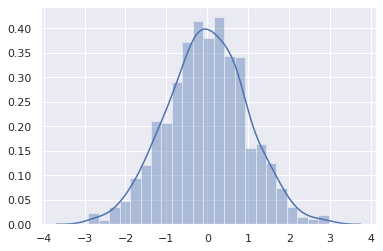

In [41]:
sns.distplot(x);

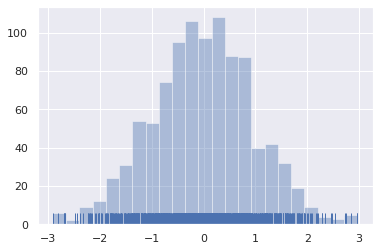

In [42]:
sns.distplot(x , kde = False , rug = True);

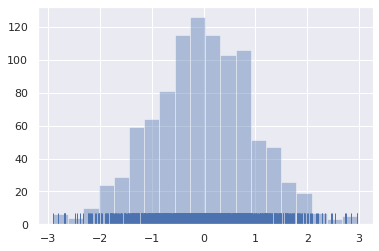

In [43]:
sns.distplot(x , kde = False , rug = True,bins = 20);

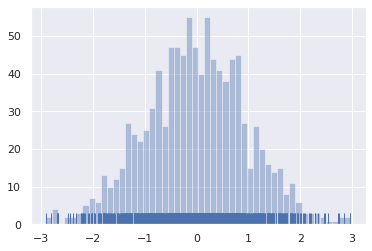

In [44]:
sns.distplot(x , kde = False , rug = True,bins = 50);

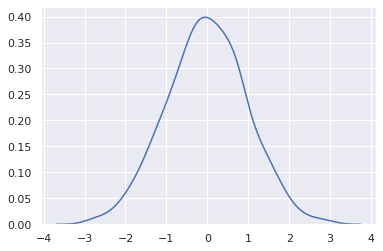

In [45]:
sns.kdeplot(x);

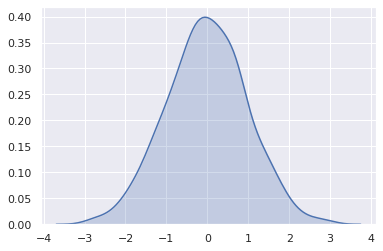

In [46]:
sns.kdeplot(x,shade = True);

In [47]:
y = np.random.uniform(size = 1000)

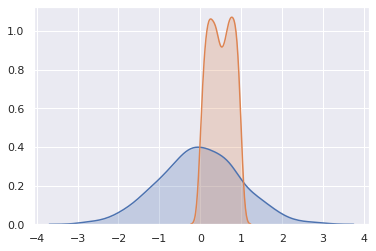

In [48]:
sns.kdeplot(x,shade = True);
sns.kdeplot(y,shade = True);

In [49]:
d = sns.load_dataset('diamonds')

In [50]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [51]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


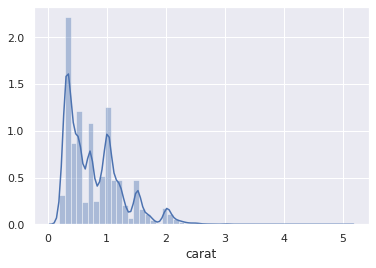

In [52]:
sns.distplot(d.carat);

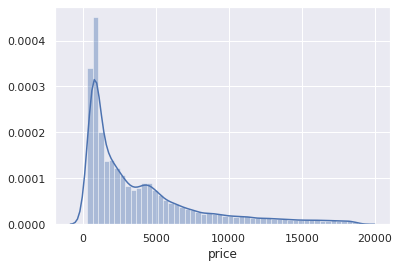

In [53]:
sns.distplot(d.price);

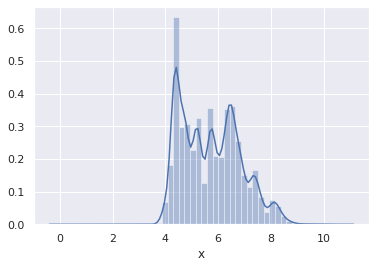

In [54]:
sns.distplot(d.x);

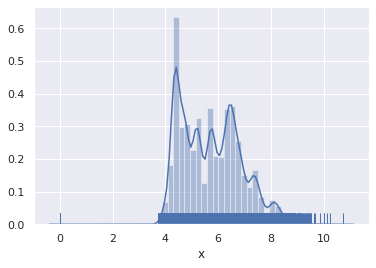

In [55]:
sns.distplot(d.x, rug = True);

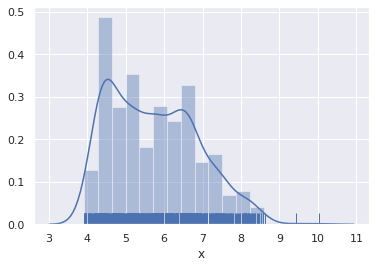

In [56]:
sns.distplot(d.sample(1000).x, rug = True);

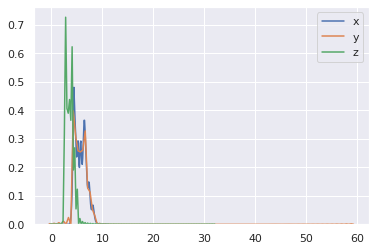

In [57]:
sns.kdeplot(d.x);
sns.kdeplot(d.y);
sns.kdeplot(d.z);

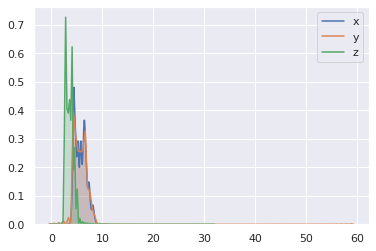

In [58]:
sns.kdeplot(d.x, shade = True);
sns.kdeplot(d.y, shade = True);
sns.kdeplot(d.z, shade = True);

### Box Plot

In [59]:
x = np.random.normal(size = 1000)

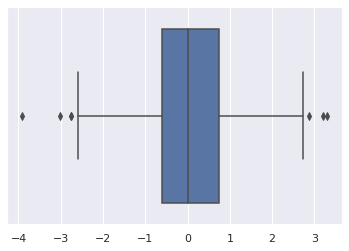

In [60]:
sns.boxplot(x)

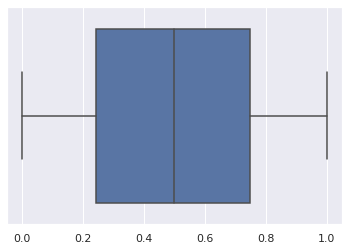

In [61]:
x = np.random.uniform(size = 1000)
sns.boxplot(x);

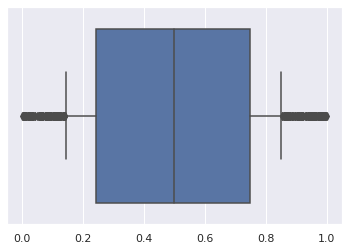

In [62]:
sns.boxplot(x,whis = 0.2);

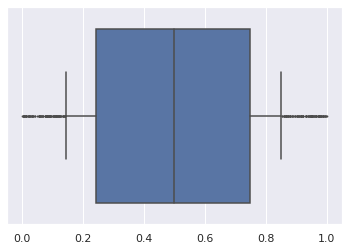

In [63]:
sns.boxplot(x,whis = 0.2,fliersize = 1);

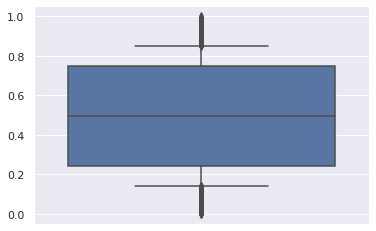

In [64]:
sns.boxplot(x,whis = 0.2,orient = "v");

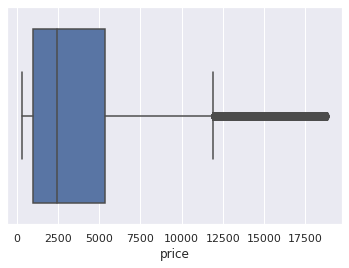

In [65]:
sns.boxplot(d.price);

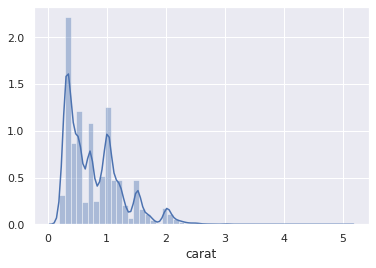

In [66]:
sns.distplot(d.carat)

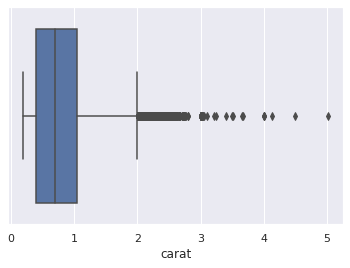

In [67]:
sns.boxplot(d.carat)

## Distribution of categorical variables

### Bar plots

In [68]:
c  = d.groupby('cut')['cut'].count()

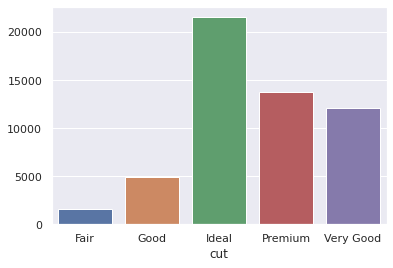

In [69]:
sns.barplot(x = c.index,y  = c.values);

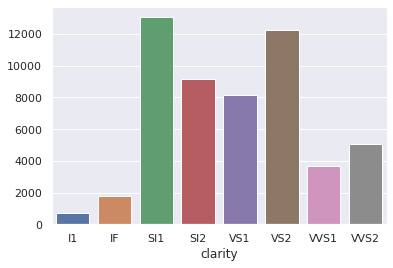

In [70]:
c  = d.groupby('clarity')['clarity'].count()
sns.barplot(x = c.index,y  = c.values);


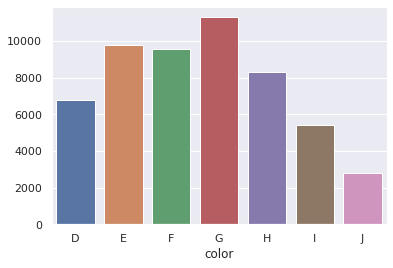

In [71]:
c  = d.groupby('color')['color'].count()
sns.barplot(x = c.index,y  = c.values);


## Joint distribution of two variables

### Jointplot

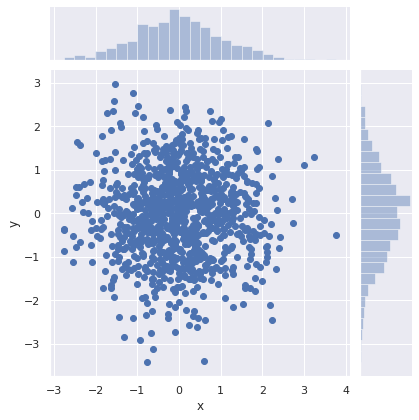

In [72]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

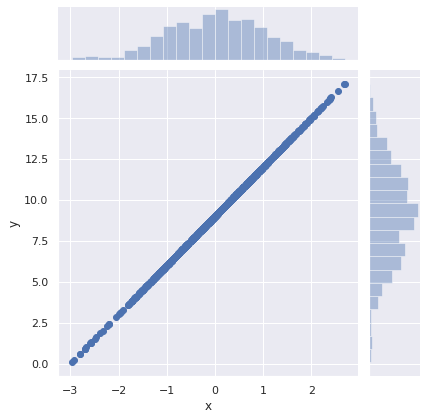

In [73]:
x = np.random.normal(size = 1000)
y = 3*x + 9 
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

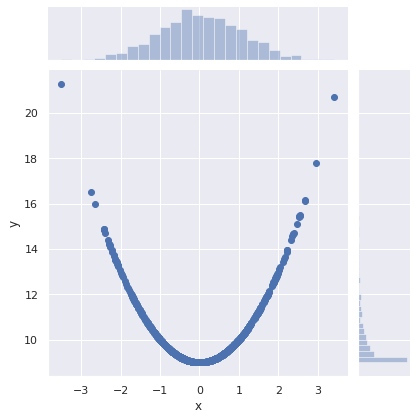

In [74]:
x = np.random.normal(size = 1000)
y = x**2 + 9 
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

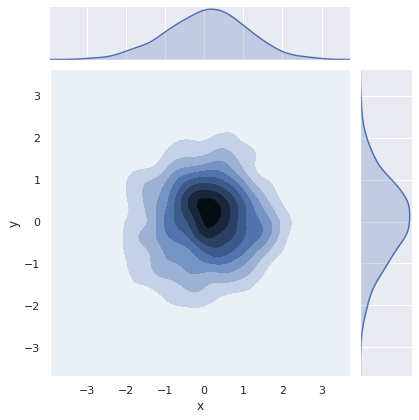

In [75]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

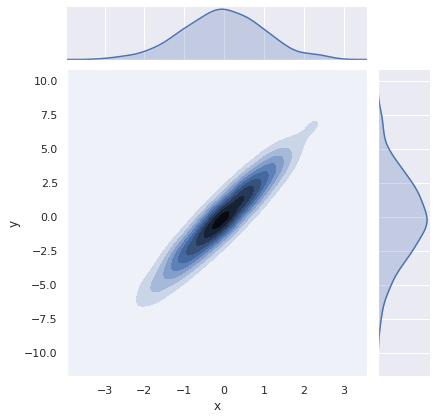

In [76]:
x = np.random.normal(size = 1000)
y = 3*x + np.random.normal(size = 1000)/5
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

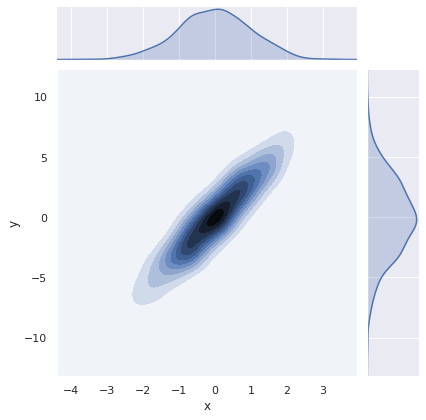

In [77]:
x = np.random.normal(size = 1000)
y = 3*x + np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

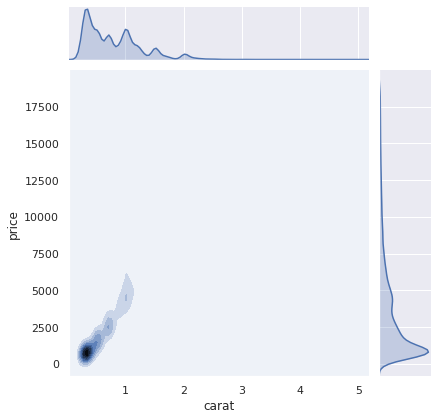

In [78]:
sns.jointplot("carat","price",data = d, kind = 'kde')

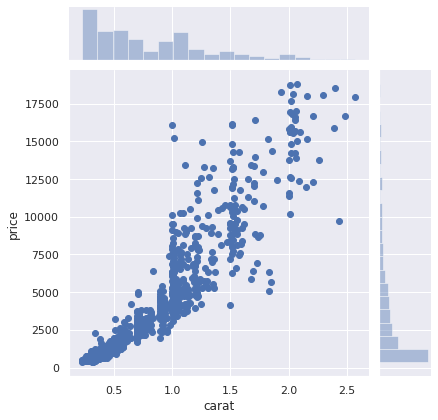

In [79]:
sns.jointplot("carat","price",data = d.sample(1000))

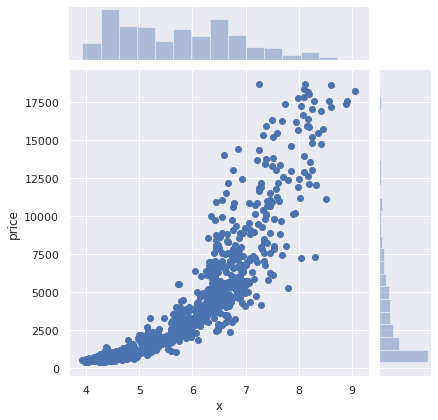

In [80]:
sns.jointplot("x","price",data = d.sample(1000))

### Swarm plot

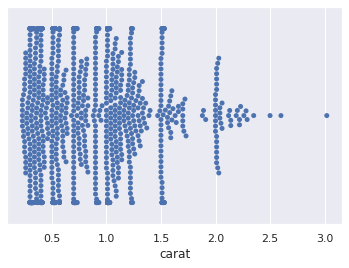

In [81]:
sns.swarmplot(d.sample(1000).carat)

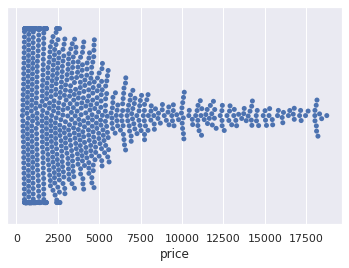

In [82]:
sns.swarmplot(d.sample(1000).price);

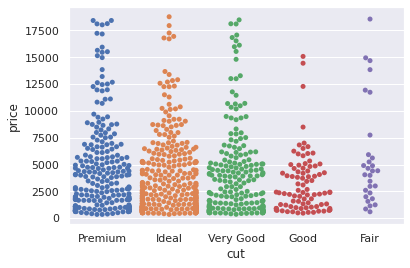

In [83]:
sns.swarmplot(x = 'cut', y = 'price', data = d.sample(1000))

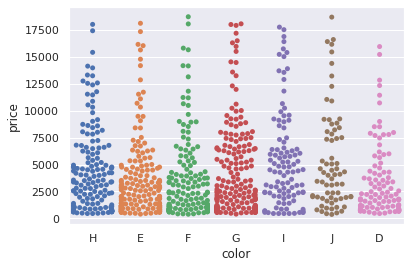

In [84]:
sns.swarmplot(x = 'color', y = 'price', data = d.sample(1000))

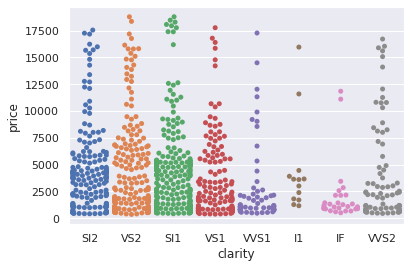

In [85]:
sns.swarmplot(x = 'clarity', y = 'price', data = d.sample(1000))

In [86]:
p = sns.load_dataset('penguins')

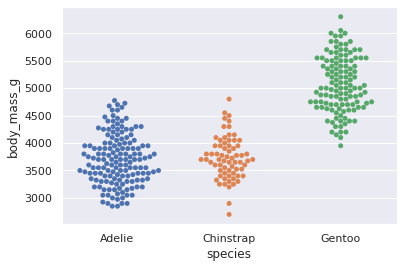

In [87]:
sns.swarmplot(x = 'species',y = "body_mass_g", data = p)

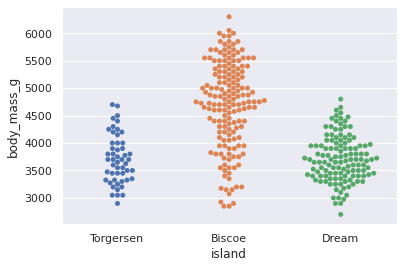

In [88]:
sns.swarmplot(x = 'island',y = "body_mass_g", data = p)

### Violin plot

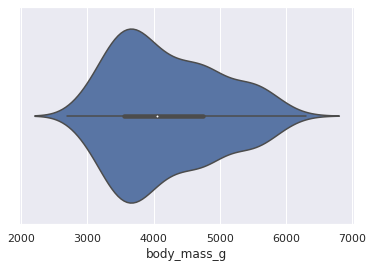

In [89]:
sns.violinplot(x = 'body_mass_g', data = p)

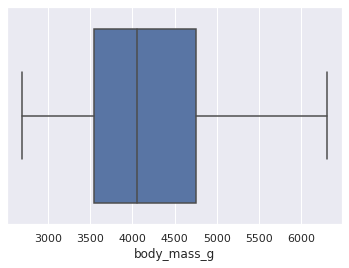

In [90]:
sns.boxplot(x = 'body_mass_g', data = p)

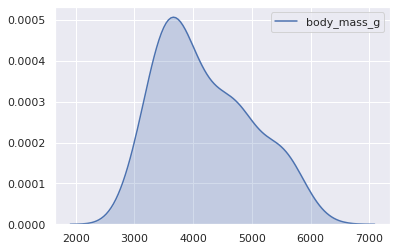

In [91]:
sns.kdeplot(p.body_mass_g , shade = True)

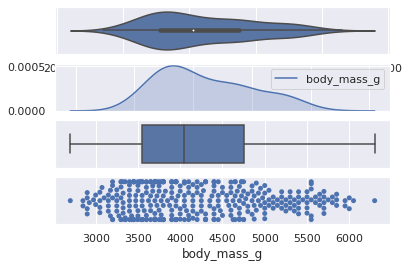

In [92]:
fig , axs  = plt.subplots(nrows = 4)
sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);

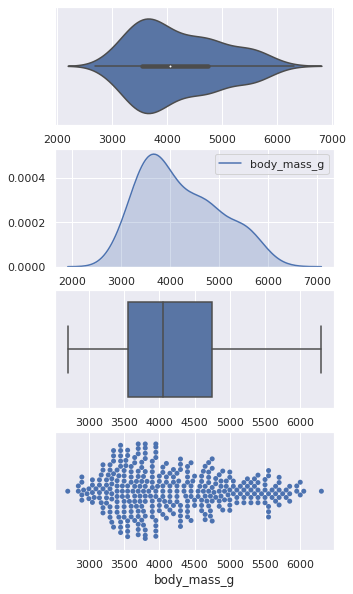

In [93]:
fig , axs  = plt.subplots(nrows = 4)
fig.set_size_inches(5,10)
sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);

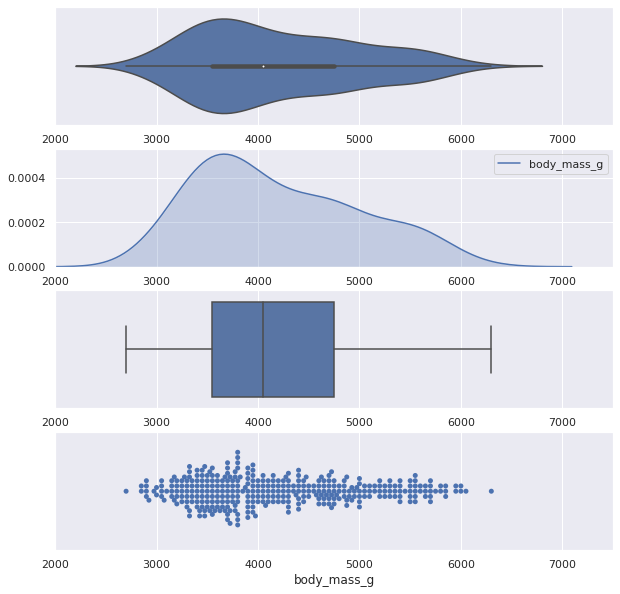

In [94]:
fig , axs  = plt.subplots(nrows = 4)
fig.set_size_inches(10,10)
p1 = sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
p1.set(xlim = (2000,7500));

p2 = sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
p2.set(xlim = (2000,7500));

p3 = sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
p3.set(xlim = (2000,7500));

p4 = sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);
p4.set(xlim = (2000,7500));


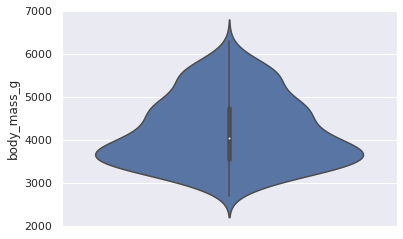

In [95]:
sns.violinplot(x = 'body_mass_g', data = p, orient = 'v');

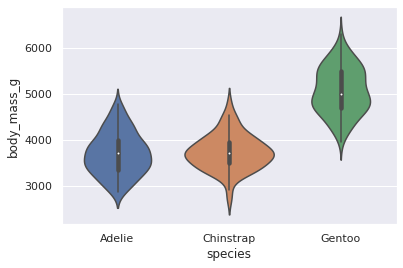

In [96]:
sns.violinplot(x = 'species', y = 'body_mass_g', data = p);

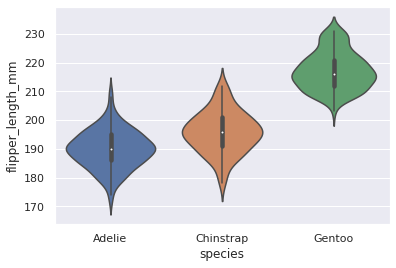

In [97]:
sns.violinplot(x = 'species', y = 'flipper_length_mm', data = p);

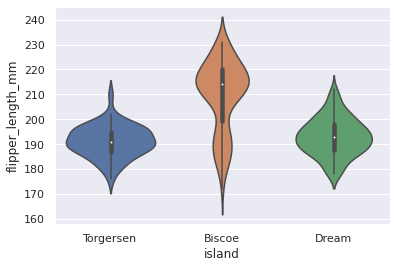

In [98]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p);

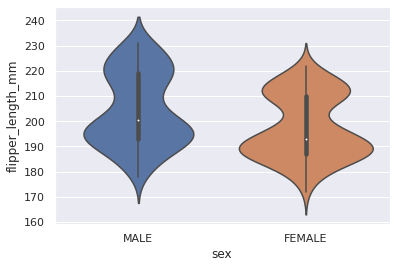

In [99]:
sns.violinplot(x = 'sex', y = 'flipper_length_mm', data = p);

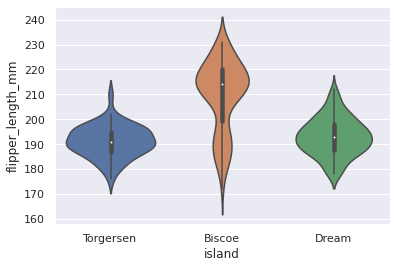

In [100]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p);

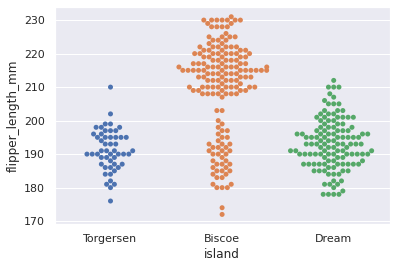

In [101]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p);

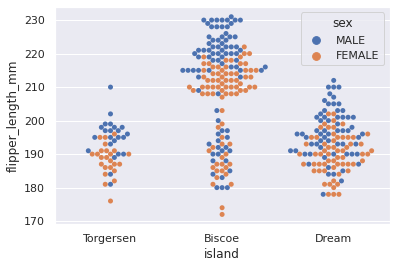

In [102]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p , hue = 'sex');

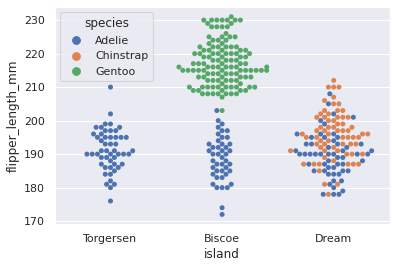

In [103]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p , hue = 'species');

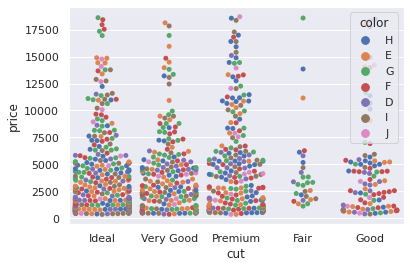

In [104]:
sns.swarmplot(x = 'cut', y = 'price', data = d.sample(1000), hue = 'color');

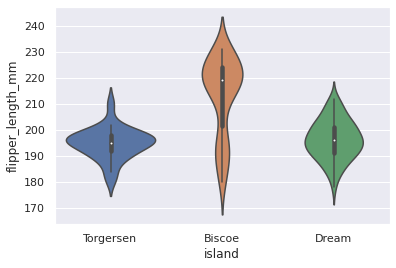

In [106]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p[p.sex == "MALE"]);

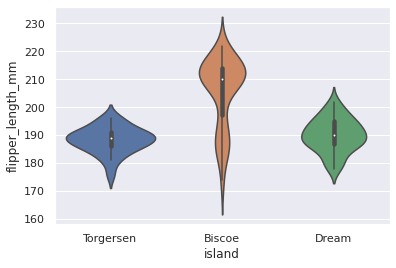

In [107]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p[p.sex == "FEMALE"]);

### Paired violin plot

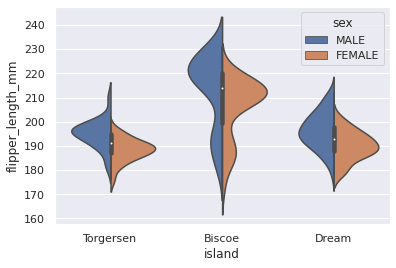

In [108]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex",split = True);

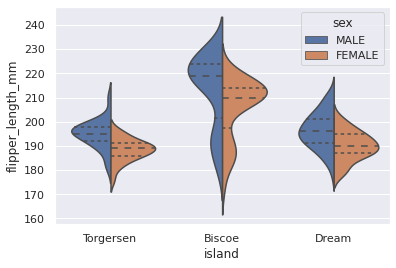

In [109]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex",
               split = True , inner = 'quartile');

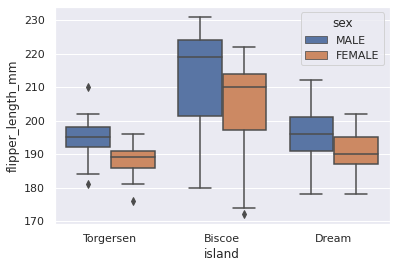

In [110]:
sns.boxplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex");

In [111]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "species",
               split = True , inner = 'quartile');

ValueError: ignored

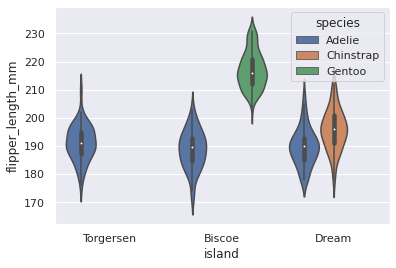

In [112]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "species");

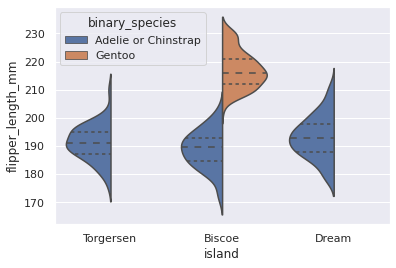

In [115]:
p['binary_species'] = p.species.apply(lambda x : 'Gentoo' if x == 'Gentoo' else 'Adelie or Chinstrap')

sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "binary_species",
               split = True , inner = 'quartile');

### Faceted Plot

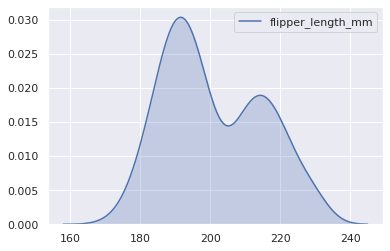

In [116]:
sns.kdeplot(p.flipper_length_mm,shade = True)

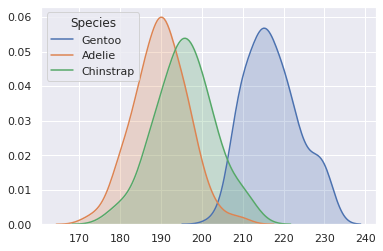

In [121]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True)
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True)
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True)
plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


In [119]:
p.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

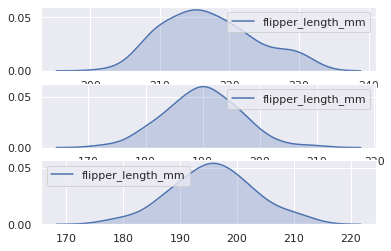

In [123]:
fig , axs = plt.subplots(nrows = 3)
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True , ax  = axs[0])
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True, ax  = axs[1])
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True, ax  = axs[2])
#plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


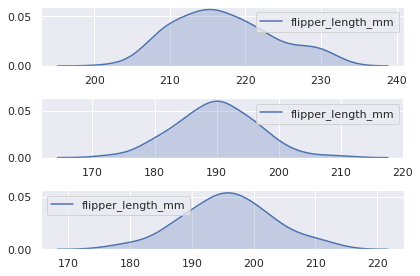

In [124]:
fig , axs = plt.subplots(nrows = 3)
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True , ax  = axs[0])
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True, ax  = axs[1])
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True, ax  = axs[2])
plt.tight_layout()
#plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


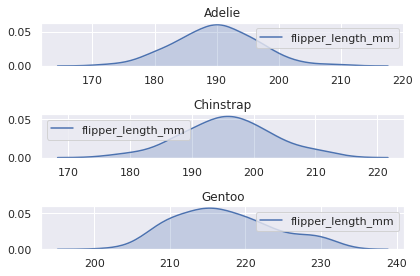

In [127]:
column_name = "species"
nrows = len(p[column_name].unique())
fig , axs = plt.subplots(nrows = nrows)
i = 0

for c_v in p[column_name].unique():
  pl = sns.kdeplot(p[p[column_name] == c_v].flipper_length_mm,shade = True , ax  = axs[i])
  pl.set_title(c_v)
  i = i + 1

plt.tight_layout()

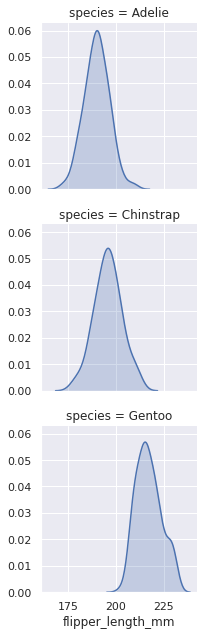

In [129]:
g = sns.FacetGrid(p , row = 'species');
g.map(sns.kdeplot,'flipper_length_mm',shade = True);

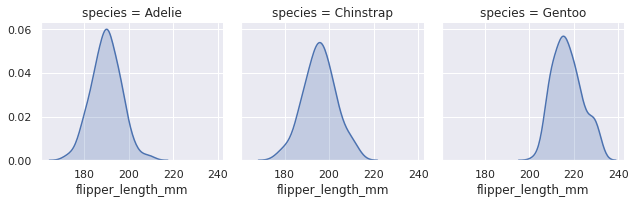

In [130]:
g = sns.FacetGrid(p , col = 'species');
g.map(sns.kdeplot,'flipper_length_mm',shade = True);

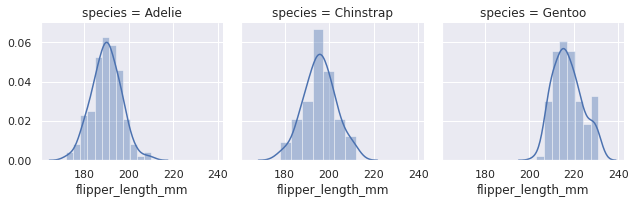

In [131]:
g = sns.FacetGrid(p , col = 'species');
g.map(sns.distplot,'flipper_length_mm');

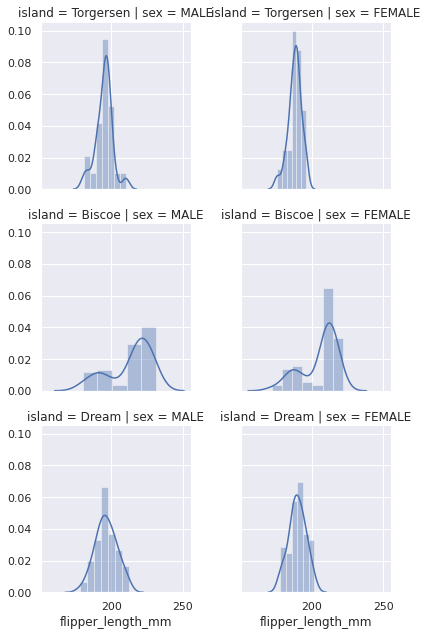

In [132]:
g = sns.FacetGrid(p , row = 'island', col = 'sex');
g.map(sns.distplot,'flipper_length_mm');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


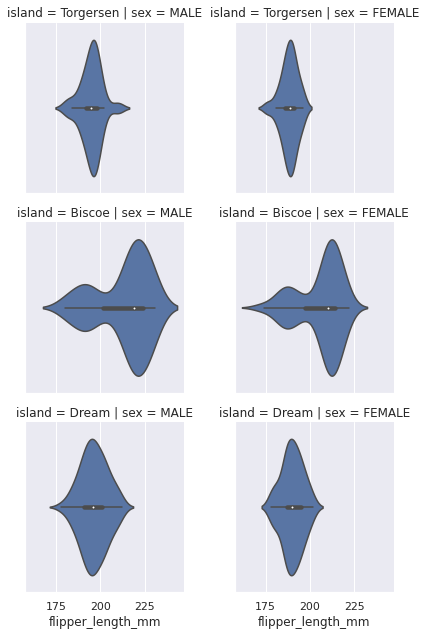

In [133]:
g = sns.FacetGrid(p , row = 'island', col = 'sex');
g.map(sns.violinplot,'flipper_length_mm');